In [1]:
import tensorflow as tf
import numpy as np

2024-08-08 14:19:18.740525: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 14:19:18.859160: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-08 14:19:18.892541: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-08 14:19:19.122280: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-08 14:19:20.938735: W tensorflow/compiler/tf2

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(
    path="/home/wiki/MNIST/data/mnist.npz"
)

In [3]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)


In [4]:
X_train, X_test = X_train / 255, X_test / 255

In [5]:
X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

print(X_train.shape)
print(X_test.shape)

I0000 00:00:1723108763.390887    1225 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723108763.665829    1225 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723108763.665919    1225 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723108763.670102    1225 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723108763.670251    1225 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

(60000, 28, 28, 1)
(10000, 28, 28, 1)


0:1723108763.904352    1225 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723108763.904457    1225 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-08 14:19:23.904469: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2112] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
I0000 00:00:1723108763.904524    1225 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-08 14:19:23.906375: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3

In [6]:
from tensorflow.keras import layers, models

model = models.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

/home/wiki/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20


I0000 00:00:1723108765.670777    1569 service.cc:146] XLA service 0x7fba1c005b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723108765.670866    1569 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-08-08 14:19:25.730222: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-08 14:19:25.952523: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 61/750 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5332 - loss: 1.4474

I0000 00:00:1723108768.804188    1569 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8744 - loss: 0.4049 - val_accuracy: 0.9795 - val_loss: 0.0686
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9816 - loss: 0.0587 - val_accuracy: 0.9819 - val_loss: 0.0611
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9890 - loss: 0.0342 - val_accuracy: 0.9876 - val_loss: 0.0442
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9923 - loss: 0.0246 - val_accuracy: 0.9863 - val_loss: 0.0485
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.9864 - val_loss: 0.0477
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9955 - loss: 0.0145 - val_accuracy: 0.9882 - val_loss: 0.0452
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9962 - loss: 0.0119 - val_accuracy: 0.9908 - val_loss: 0.0399
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9975 - loss: 0.0082 - val_accuracy: 0.9893 - val_

In [9]:
history.history

{'accuracy': [0.9459999799728394,
  0.9825416803359985,
  0.9887916445732117,
  0.9913125038146973,
  0.9929583072662354,
  0.9950416684150696,
  0.9958750009536743,
  0.9966874718666077,
  0.9972916841506958,
  0.9977708458900452,
  0.9980833530426025,
  0.9980000257492065,
  0.9979583621025085,
  0.9981874823570251,
  0.9986666440963745,
  0.9995416402816772,
  0.9984375238418579,
  0.9981874823570251,
  0.9992083311080933,
  0.999833345413208],
 'loss': [0.17697902023792267,
  0.05439276993274689,
  0.036297012120485306,
  0.026839667931199074,
  0.02140446938574314,
  0.014839780516922474,
  0.012119553983211517,
  0.009825287386775017,
  0.008579013869166374,
  0.0068369777873158455,
  0.005968278273940086,
  0.0060064345598220825,
  0.005899862386286259,
  0.005511112976819277,
  0.0037929173558950424,
  0.0016915028681978583,
  0.004811454098671675,
  0.005729904863983393,
  0.0027788353618234396,
  0.0007655064109712839],
 'val_accuracy': [0.9794999957084656,
  0.98191666603088

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9892 - loss: 0.0631
Test Accuracy: 0.9918000102043152
Test Loss: 0.045357611030340195


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


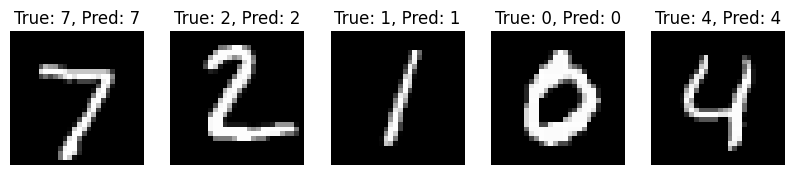

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions
predictions = model.predict(X_test)

# Convert EagerTensors to NumPy arrays
X_test_np = X_test
y_test_np = y_test

# Plot some test images with their predicted and true labels
num_images = 5
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(np.squeeze(X_test_np[i]), cmap='gray')
    plt.title(f"True: {y_test_np[i]}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


In [12]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(hp):
    model = Sequential()

    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
        kernel_size = (3, 3),
        activation='relu',
        input_shape=(28, 28, 1)
    ))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=64, max_value=256, step=64),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
        activation='relu'
    ))

    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [13]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='mnist_tuning'
)

Reloading Tuner from my_dir/mnist_tuning/tuner0.json


In [14]:
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of filters in the first conv layer is {best_hps.get('conv_1_filters')}.
The optimal number of filters in the second conv layer is {best_hps.get('conv_2_filters')}.
The optimal number of units in the dense layer is {best_hps.get('dense_units')}.
The optimal dropout rate is {best_hps.get('dropout_rate')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of filters in the first conv layer is 128.
The optimal number of filters in the second conv layer is 64.
The optimal number of units in the dense layer is 384.
The optimal dropout rate is 0.4.
The optimal learning rate for the optimizer is 0.0004833532453408087.



In [15]:
best_model = build_model(best_hps)

history = best_model.fit(X_train, y_train, epochs=20, batch_size = 64 ,validation_split=0.2)

Epoch 1/20


/home/wiki/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8478 - loss: 0.4916 - val_accuracy: 0.9808 - val_loss: 0.0669
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9785 - loss: 0.0700 - val_accuracy: 0.9851 - val_loss: 0.0483
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9864 - loss: 0.0432 - val_accuracy: 0.9859 - val_loss: 0.0453
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9898 - loss: 0.0333 - val_accuracy: 0.9891 - val_loss: 0.0356
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9914 - loss: 0.0258 - val_accuracy: 0.9902 - val_loss: 0.0319
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9930 - loss: 0.0195 - val_accuracy: 0.9911 - val_loss: 0.0321
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9908 - val_loss: 0.0339
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9946 - loss: 0.0153 - val_accuracy: 0.9909 - val_

In [16]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9906 - loss: 0.0356
Test Accuracy: 0.9923999905586243
Test Loss: 0.03034202940762043


In [17]:
best_model.save('best_mnist_model.keras')